In [2]:
### he we compare ILC3 PCHi-C data with that of other blood cell types (from Javierre et al., 2016)
### Fig. 1E

library(data.table)
library(FactoMineR)
library(Chicago)
library(ggplot2)
library(ggrepel)
library(stringr)
library(liftOver)
library(umap)


Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
Warning message:
“package ‘Chicago’ was built under R version 3.6.3”


Welcome to CHiCAGO - version 1.14.0

If you are new to CHiCAGO, please consider reading the vignette through the command: vignette("Chicago").

NOTE: Default values of tlb.minProxOEPerBin and tlb.minProxB2BPerBin changed as of Version 1.1.5. No action is required unless you specified non-default values, or wish to re-run the pipeline on old chicagoData objects. See news(package="Chicago")

Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
Warning message:
“package ‘liftOver’ was built under R version 3.6.3”
Loading required package: gwascat

Warning message:
“package ‘gwascat’ was built under R version 3.6.3”
Loading required package: Homo.sapiens

Warning message:
“package ‘Homo.sapiens’ was built under R version 3.6.3”
Loading required package: AnnotationDbi

Warning message:
“package ‘A

In [1]:
# merge individual Rds objects for ILC3s and select the lines with no NAs in any replicate

ilc1 <- readRDS("~/spivakov_analysis_live/miniPCHiC/hILCs/hILCs_run2/Chicago/HIII_binning/hILC3_no1_Step2/data/hILC3_no1_Step2.Rds")
ilc2 <- readRDS("~/spivakov_analysis_live/miniPCHiC/hILCs/hILCs_run2/Chicago/HIII_binning/hILC3_no2_Step2/data/hILC3_no2_Step2.Rds")
ilc3 <- readRDS("~/spivakov_analysis_live/miniPCHiC/hILCs/hILCs_run2/Chicago/HIII_binning/hILC3_no23_Step2/data/hILC3_no23_Step2.Rds")

ilc1_sel <- ilc1@x[,c("baitID", "otherEndID", "score")]
ilc2_sel <- ilc2@x[,c("baitID", "otherEndID", "score")]
ilc3_sel <- ilc3@x[,c("baitID", "otherEndID", "score")]

setnames(ilc1_sel, "score", "ILC_rep1")
setnames(ilc2_sel, "score", "ILC_rep2")
setnames(ilc3_sel, "score", "ILC_rep3")

ilc_merge_12 <- merge(ilc1_sel, ilc2_sel, by = c("baitID", "otherEndID"), all = TRUE)
ilc_merge <- merge(ilc3_sel, ilc_merge_12, by = c("baitID", "otherEndID"), all = TRUE)

ilc_merge[,na_line := ifelse((is.na(ILC_rep1) | is.na(ILC_rep2) | is.na(ILC_rep3)), TRUE, FALSE), by = .I]
ilc_merge_nona <- ilc_merge[na_line == FALSE]

rm(ilc_merge, ilc1, ilc2, ilc3, ilc_merge_12)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
Warning message:
“package ‘Chicago’ was built under R version 3.6.3”


Welcome to CHiCAGO - version 1.14.0

If you are new to CHiCAGO, please consider reading the vignette through the command: vignette("Chicago").

NOTE: Default values of tlb.minProxOEPerBin and tlb.minProxB2BPerBin changed as of Version 1.1.5. No action is required unless you specified non-default values, or wish to re-run the pipeline on old chicagoData objects. See news(package="Chicago")

Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”


In [2]:
# merge individual Rds objects for HIII(DII) CD4 and select the lines with no NAs in any replicate

cd4_50k_rep1 <- readRDS("~/miniPCHiC/PCHiC_DpnII_merged/Chicago/HIII_binning/CD4_50K_Step2/data/CD4_50K_Step2.Rds")
cd4_50k_rep2 <- readRDS("~/miniPCHiC/PCHiC_DpnII_merged/Chicago/HIII_binning/CD4_1MC_Step2/data/CD4_1MC_Step2.Rds")
cd4_1m_rep1 <- readRDS("~/miniPCHiC/PCHiC_DpnII_merged/Chicago/HIII_binning/CD4_1M_Step2/data/CD4_1M_Step2.Rds")
cd4_1m_rep2 <- readRDS("~/miniPCHiC/PCHiC_DpnII_merged/Chicago/HIII_binning/CD4_1MC_Step2/data/CD4_1MC_Step2.Rds")

cd4_50k_rep1_sel <- cd4_50k_rep1@x[,c("baitID", "otherEndID", "score")]
cd4_50k_rep2_sel <- cd4_50k_rep2@x[,c("baitID", "otherEndID", "score")]
cd4_1m_rep1_sel <- cd4_1m_rep1@x[,c("baitID", "otherEndID", "score")]
cd4_1m_rep2_sel <- cd4_1m_rep2@x[,c("baitID", "otherEndID", "score")]

setnames(cd4_50k_rep1_sel, "score", "CD4_50K_rep1")
setnames(cd4_50k_rep2_sel, "score", "CD4_50K_rep2")
setnames(cd4_1m_rep1_sel, "score", "CD4_1M_rep1")
setnames(cd4_1m_rep2_sel, "score", "CD4_1M_rep2")


cd4_50k_merge <- merge(cd4_50k_rep1_sel, cd4_50k_rep2_sel, by = c("baitID", "otherEndID"), all = TRUE)
cd4_1m_merge <- merge(cd4_1m_rep1_sel, cd4_1m_rep2_sel, by = c("baitID", "otherEndID"), all = TRUE)
cd4_merge <- merge(cd4_50k_merge, cd4_1m_merge, by = c("baitID", "otherEndID"), all = TRUE)

cd4_merge[,na_line := ifelse((is.na(CD4_50K_rep1) | is.na(CD4_50K_rep2) | is.na(CD4_1M_rep1) |  is.na(CD4_1M_rep2)), TRUE, FALSE), by = .I]
cd4_merge_nona <- cd4_merge[na_line == FALSE]

rm(cd4_50k_rep1, cd4_50k_rep2, cd4_1m_rep1, cd4_1m_rep2,
   cd4_50k_merge, cd4_1m_merge, cd4_merge)

# merge ILC and CD4

ilc_cd4_merge <- merge(cd4_merge_nona, ilc_merge_nona, by = c("baitID", "otherEndID"), all = TRUE)
ilc_cd4_merge[is.na(ilc_cd4_merge)] <- 0
ilc_cd4_merge[,na_line.x := NULL]
ilc_cd4_merge[,na_line.y := NULL]


##### javierre full set plus cd4 and ilc

fullJ <- readRDS("~/fraser/GWAS_Processing/Samples/Samples/Rda_reweighted/full/individual_samples_full_cutoff0.Rds")

merge_jav_full_cd4_ilc <- merge(fullJ, ilc_cd4_merge, by.x = c("baitID", "oeID"), by.y = c("baitID", "otherEndID"), all = TRUE)
merge_jav_full_cd4_ilc <- as.data.table(merge_jav_full_cd4_ilc)

merge_jav_full_cd4_ilc[is.na(merge_jav_full_cd4_ilc)] <- 0

targetColumns <- names(merge_jav_full_cd4_ilc)[!(names(merge_jav_full_cd4_ilc) %in% names(merge_jav_full_cd4_ilc)[1:11])]

x <- merge_jav_full_cd4_ilc
sel <- which(colnames(x) %in% targetColumns)
x <- x[,c(sel), with=FALSE]
sel <- rep(FALSE, nrow(x))
for(cl in targetColumns){
  sel <- sel | x[,get(cl) > 5 & !is.na(get(cl))] ##Get any rows where at least one score > 5.
}
x <- x[sel,]



In [3]:
x_jav_ilc <- x[,c("CD4_50K_rep1", "CD4_50K_rep2", "CD4_1M_rep1", "CD4_1M_rep2") := NULL]


In [58]:
eig_dt <- as.data.table(Jav_full_ilc_pca$eig)
colnames(eig_dt) <- c("eigenvalue", "percent_of_var", "cumulative_percent_of_var")

head(eig_dt)

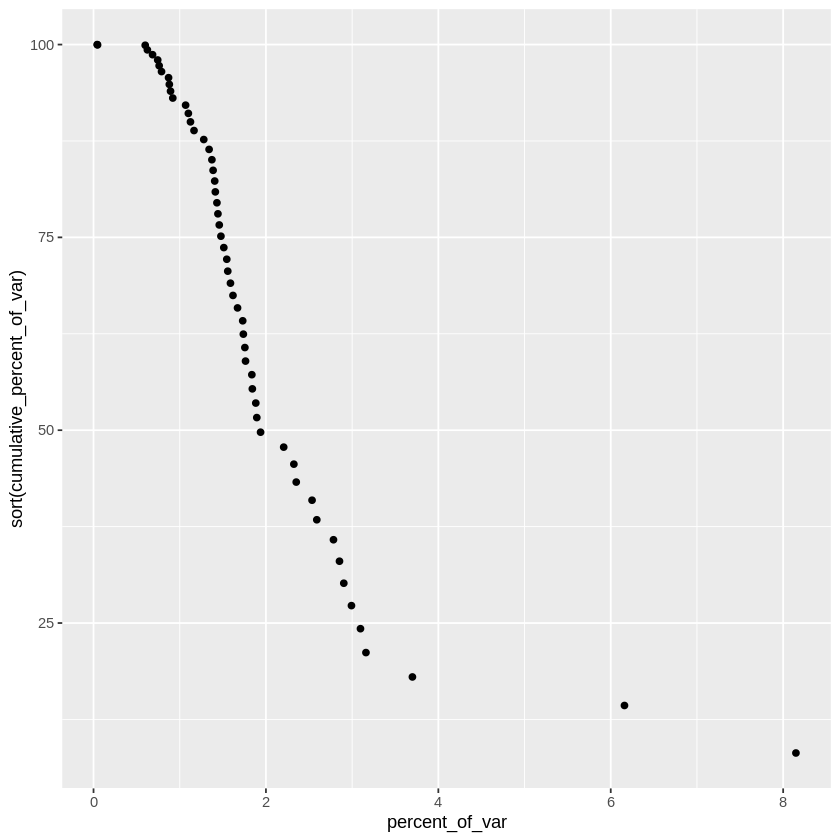

In [167]:
ggplot(eig_dt, aes(x = percent_of_var, y = sort(cumulative_percent_of_var))) +
  geom_point()

In [7]:
## run PCA on merged Javierre + ILC chicago peakmatrix

Jav_full_ilc_pca_trans <- t(x_jav_ilc)
Jav_full_ilc_pca_trans <- asinh(Jav_full_ilc_pca_trans)
Jav_full_ilc_pca = PCA(Jav_full_ilc_pca_trans, graph = FALSE, ncp= 55)

scores_Jav_full_ilc_pca <- as.data.frame(Jav_full_ilc_pca$ind$coord)
scores_Jav_full_ilc_pca <- setDT(scores_Jav_full_ilc_pca, keep.rownames = TRUE)
setnames(scores_Jav_full_ilc_pca, "rn", "samples")
scores_Jav_full_ilc_pca[, type := as.factor(str_split_fixed(scores_Jav_full_ilc_pca$sample, "_", 2)[,1])]

rownames(scores_Jav_full_ilc_pca) <- scores_Jav_full_ilc_pca$samples


## PC1 (accounting for <10 % of the variance) segregated the three ILC3 replicates from the remaining cell types
## therefore PC1 most likely corresponded to the difference in PCHi-C methods, resolution and sequencing depth. 
## We disregarded PC1, and focused on PC2, PC3 and PC4, accounting for 6.16%, 3.7% and 3.16% of variance across all tissues, 
## respectively (components beyond PC4 accounted for <3.1% of variance each and were disregarded). 
## For visualisation purposes, we combined these three components using the UMAP non-linear dimensionality reduction algorithm

umap_pca_no1 <- umap(scores_Jav_full_ilc_pca[,-c(1,2, 6:57)])

df_no1 <- data.frame(x = umap_pca_no1$layout[,1],
                 y = umap_pca_no1$layout[,2],
                 Species = rownames(scores_Jav_full_ilc_pca))

p <- ggplot(df_no1, aes(x, y, colour = Species)) +
  geom_point(aes(colour = factor(Species)), shape = 21, size = 1, stroke = 1) +
  geom_text_repel(aes(label = Species, colour = factor(Species), 
                      segment.linetype = 2, 
                      segment.size = 0.3, segment.ncp = 2), 
                  alpha = 0.8, size = 6, max.overlaps = 1000) +
  ggtitle("Javierre CD4 ILC blood cells PCA") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "grey45"), 
        legend.position = "none")

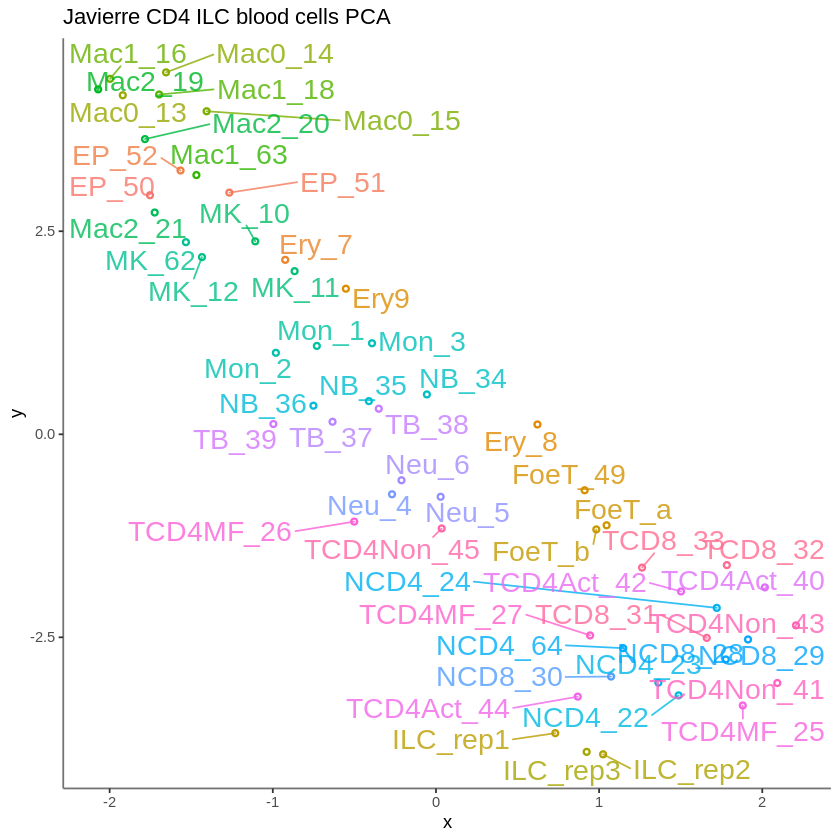

In [37]:
p

In [36]:
### comparison to Javierre with ILC data processed as HindIII

## load Javierre# load Javierre et al
Jav_peakm <- fread("~/miniPCHiC/OSF_Javierre_PCHiC_peak_matrix_cutoff5.txt.gz")
Jav_peakm[,contactID := paste0(baitID, "_", oeID)]

## load DII as HindIII ILC
hILC <- readRDS("~/miniPCHiC/hILCs/hILCs_run2/Chicago/HIII_binning/hILC3_GRCh37_HIII_merged_Step2/data/hILC3_GRCh37_HIII_merged_Step2.Rds")

ilc_sel <- hILC@x[score>5][,contactID := paste0(baitID, "_", otherEndID)]
ilc_sel[,contact_inJavierre := ifelse((contactID %in% Jav_peakm$contactID), "TRUE", "FALSE")]
ilc_sel[,oe_inJavierre := ifelse((otherEndID %in% Jav_peakm$oeID), "TRUE", "FALSE")]



In [3]:
## liftover epigenetic data from hg38 to hg19
chain <- import.chain("~/miniPCHiC/hILCs/hILCs_run2/hg38ToHg19.over.chain")

atac <- fread("~/miniPCHiC/hILCs/hILCs_run1/tonsil_ILC3_data_4_pcHiC/ILC3_ATACseq_p1e4.bed")
k27ac <- fread("~/miniPCHiC/hILCs/hILCs_run1/tonsil_ILC3_data_4_pcHiC/ILC3_H3K27ac_p1e4.bed")

atac_hg38_GR <- atac[, GRanges(seqnames = V1, ranges = IRanges(start = V2, end = V3))]
atac_hg19 <- as.data.table(liftOver(atac_hg38_GR, chain))[,c("seqnames", "start", "end")]

k27ac_hg38_GR <- k27ac[, GRanges(seqnames = V1, ranges = IRanges(start = V2, end = V3))]
k27ac_hg19 <- as.data.table(liftOver(k27ac_hg38_GR, chain))[,c("seqnames", "start", "end")]

epirmap <- function(epiprof, rmap_fres, overlap_by){
  
    colnames(epiprof) <- c("V1", "V2", "V3")
    
    # overlap_by: "summit" or "region"

    if (overlap_by == "summit"){
      # define middle point of a peak
      epiprof[,mid := (V2 + V3) /2]
      epiprof[,mid_2 := (V2 + V3) /2]
      epiprof <- epiprof[,c("V1", "V2", "V3", "mid", "mid_2")]
      epiprof[,V1 := gsub("chr", "", V1)]
    }else{
      # define middle point of a peak
      epiprof[,mid := V2]
      epiprof[,mid_2 := V3]
      epiprof <- epiprof[,c("V1", "V2", "V3", "mid", "mid_2")]
      epiprof[,V1 := gsub("chr", "", V1)]
    }


    # assign peaks to fres rmap bins by summit
    setkey(epiprof, V1, mid, mid_2)
    setkey(rmap_fres, V1, V2, V3)
    epi_rmap <- foverlaps(epiprof, rmap_fres, by.x = c("V1", "mid", "mid_2"), by.y = c("V1", "V2", "V3"))
    epi_rmap <- epi_rmap[,c("V1", "mid", "mid_2", "V4")]
    setnames(epi_rmap, "V4", "fres_ID")

    return(epi_rmap)
}

h3_rmap_hg19 <- fread("~/spivakov_analysis_live/Design/Human_hg19/Digest_Human_HindIII.rmap") 

atac_hg19_rmap <- epirmap(atac_hg19, h3_rmap_hg19, "summit")
k27ac_hg19_rmap <- epirmap(k27ac_hg19, h3_rmap_hg19, "summit")

ilc_sel[,ATAC := ifelse(otherEndID %in% atac_hg19_rmap$fres_ID, "TRUE", "FALSE")]
ilc_sel[,H3K27ac := ifelse(otherEndID %in% k27ac_hg19_rmap$fres_ID, "TRUE", "FALSE")]


In [39]:
# proportion of active PIRs forming interactions in Javierre
length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE][oe_inJavierre == TRUE]$otherEndID))/
length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE]$otherEndID))

length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE][oe_inJavierre == TRUE]$otherEndID))
length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE]$otherEndID))

[1] 0.8039521

[1] 12409

[1] 15435

In [40]:
# proportion of active PIRs forming *same* interactions in Javierre
length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE][contact_inJavierre == TRUE]$otherEndID))/
length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE]$otherEndID))

length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE][contact_inJavierre == TRUE]$otherEndID))
length(unique(ilc_sel[ATAC == TRUE | H3K27ac == TRUE]$otherEndID))

[1] 0.5865889

[1] 9054

[1] 15435